In [75]:
# This notebook illustrates exploratory analysis on sentiment tweeter data. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install plotly
import plotly.figure_factory as ff
import re
import string
from collections import Counter
import plotly.express as px
from nltk.corpus import stopwords
#!pip install spacy
import spacy
import plotly.graph_objs as go
import nltk

#!pip install sklearn

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report



In [26]:
df = pd.read_csv("Tweeter_Exploratory_Data.csv")
df


,Company,Tweet Id,Date,Follower Count,Account Verified,Favorite Count,Retweets,Tweet Text,Clean Text,Clean Tweet,...,Polarity,Subjectivity,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
0,Facebook,1.450000e+18,10/18/21,24,False,0,261,b'RT @JasonMillerinDC: Facebook users allowed ...,"b'RT Facebook users allowed to share advice, t...",b RT Facebook users allowed to share advice t...,...,-0.500000,0.500000,328.950012,335.890015,327.500000,335.339996,21585000,0,0,FB
1,Facebook,1.450000e+18,10/18/21,173,False,0,24,b'RT @Q_Review: Facebook just reminded me of a...,b'RT Facebook just reminded me of a really fun...,b RT Facebook just reminded me of a really fun...,...,0.250000,1.000000,328.950012,335.890015,327.500000,335.339996,21585000,0,0,FB
2,Facebook,1.450000e+18,10/18/21,49,False,0,2581,b'RT @disclosetv: NEW - Russia is working on a...,b'RT NEW - Russia is working on a law that wou...,b RT NEW Russia is working on a law that wou...,...,0.084848,0.260606,328.950012,335.890015,327.500000,335.339996,21585000,0,0,FB
3,Facebook,1.450000e+18,10/18/21,84,False,0,0,b'@facebookapp my mother keeps getting these w...,b'@facebookapp my mother keeps getting these w...,b facebookapp my mother keeps getting these w...,...,-0.500000,1.000000,328.950012,335.890015,327.500000,335.339996,21585000,0,0,FB
4,Facebook,1.450000e+18,10/18/21,4099,False,0,0,b'@rajeevbisht @DTruth19265048 @KathetKusum @p...,b'@rajeevbisht Done\nhttps://t.co/guXgse2Z0E',b rajeevbisht Done nhttps t co guXgse2Z0E,...,0.000000,0.000000,328.950012,335.890015,327.500000,335.339996,21585000,0,0,FB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,Apple,1.450000e+18,10/24/21,386,False,0,116,"b'RT @bpinradio: Every day Money is growing, m...","b'RT Every day Money is growing, mainly driven...",b RT Every day Money is growing mainly driven...,...,0.166667,0.333333,149.690002,150.179993,148.639999,148.690002,58839600,0,0,AAPL
17994,Apple,1.450000e+18,10/24/21,84,False,0,24,b'RT @VoIuptuousMaja: PRE-ORDER NOW\n\xe2\x80\...,b'RT PRE-ORDER NOW\n\xe2\x80\x94 WAIT FOR ME \...,b RT PRE ORDER NOW n xe2 x80 x94 WAIT FOR ME ...,...,0.000000,0.000000,149.690002,150.179993,148.639999,148.690002,58839600,0,0,AAPL
17995,Apple,1.450000e+18,10/24/21,17,False,0,0,b'@skylerthehomo @Apple Request @unicode make...,b'@skylerthehomo Request makes one\xe2\x80\xa6...,b skylerthehomo Request makes one xe2 x80 xa6...,...,0.000000,0.000000,149.690002,150.179993,148.639999,148.690002,58839600,0,0,AAPL
17996,Apple,1.450000e+18,10/24/21,19,False,0,0,b'Green Chateau 2017 Gewurztraminer: Overwhelm...,b'Green Chateau 2017 Gewurztraminer: Overwhelm...,b Green Chateau 2017 Gewurztraminer Overwhelm...,...,0.150000,0.650000,149.690002,150.179993,148.639999,148.690002,58839600,0,0,AAPL


In [16]:
temp = df.groupby('Sentimet_Type').count()['Final Clean'].reset_index().sort_values(by='Final Clean', ascending=False)  
temp

,Sentimet_Type,Final Clean
2,Positive,7962
1,Neutral,5536
0,Negative,4475


<AxesSubplot:xlabel='Sentimet_Type', ylabel='count'>

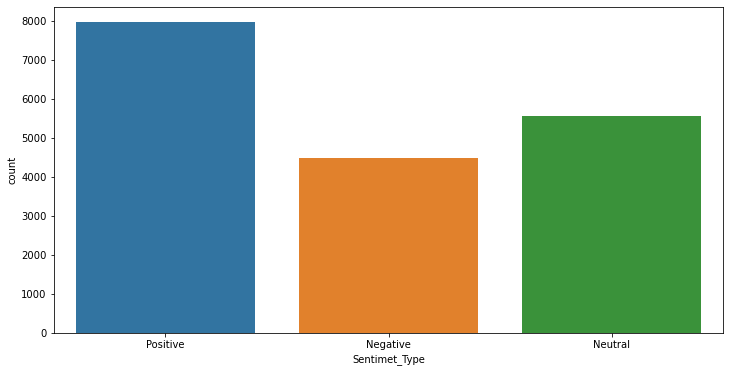

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Sentimet_Type', data=df)

In [19]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

#

,Tweet Id,Follower Count,Account Verified,Favorite Count,Retweets,Negative_Score,Neutral_Score,Positive_Score,Compound_Score,Polarity,Subjectivity,Open,High,Low,Close,Volume,Dividends,Stock Splits
Tweet Id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Follower Count,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Account Verified,nan,0.25,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Favorite Count,nan,0.15,0.10,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Retweets,nan,-0.01,-0.03,-0.01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Negative_Score,nan,-0.01,-0.01,-0.01,0.11,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Neutral_Score,nan,-0.00,0.02,0.00,-0.03,-0.53,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Positive_Score,nan,0.01,-0.01,0.01,-0.06,-0.22,-0.67,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Compound_Score,nan,0.02,0.00,0.02,-0.07,-0.68,-0.14,0.75,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Polarity,nan,0.01,0.01,0.02,-0.12,-0.43,-0.06,0.44,0.53,nan,nan,nan,nan,nan,nan,nan,nan,nan


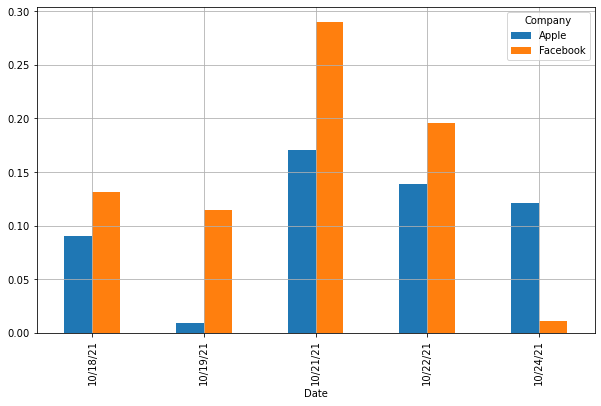

In [28]:
plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and ticker columns from tweeter and calculate the mean
mean_scores = df.groupby(['Company','Date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('Compound_Score', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()

In [45]:
daily_mean = df.groupby(['Company','Date']).mean()
daily_mean

Tweet Id  Follower Count   Account Verified  \
Company  Date                                                        
Apple    10/18/21  1.450000e+18     21590.710000          0.015000   
         10/19/21  1.450000e+18     27879.422000          0.034667   
         10/21/21  1.450000e+18     18148.648000          0.030000   
         10/22/21  1.450000e+18      5193.396000          0.018000   
         10/24/21  1.450000e+18     13416.817211          0.019346   
Facebook 10/18/21  1.450000e+18      5366.108800          0.014800   
         10/19/21  1.450000e+18      6914.404250          0.030250   
         10/21/21  1.450000e+18     15921.522000          0.019333   
         10/22/21  1.450000e+18     19645.060667          0.016667   
         10/24/21  1.450000e+18      8750.397828          0.026007   

                   Favorite Count     Retweets  Negative_Score  Neutral_Score  \
Company  Date                                                                   
Apple    10/18/21        0.210000   858.970000        0.044253       0.874121   
         10/19/21        0.124000  2502.600000        0.108998       0.810607   
         10/21/21        0.144000   494.820000        0.038374       0.853788   
         10/22/21        0.098000   950.230000        0.025860       0.889520   
         10/24/21        0.300200   602.028019        0.041378       0.862955   
Facebook 10/18/21        0.072000   570.416400        0.050985       0.848090   
         10/19/21        0.168500   637.440500        0.064400       0.824541   
         10/21/21        0.092000   445.799333        0.031454       0.820505   
         10/22/21        0.229333   609.650667        0.027217       0.858989   
         10/24/21        0.182052   752.066305        0.091116       0.816401   

                   Positive_Score  Compound_Score  Polarity  Subjectivity  \
Company  Date                                                               
Apple    10/18/21        0.080625        0.090373  0.095233      0.294714   
         10/19/21        0.080386        0.009402 -0.034499      0.418631   
         10/21/21        0.107824        0.170556  0.104106      0.287212   
         10/22/21        0.084612        0.138719  0.075403      0.270157   
         10/24/21        0.094312        0.121514  0.114326      0.289670   
Facebook 10/18/21        0.099330        0.131692  0.044124      0.322405   
         10/19/21        0.107071        0.114452  0.052462      0.340289   
         10/21/21        0.148037        0.289824  0.225317      0.418884   
         10/22/21        0.112456        0.195673  0.099392      0.283933   
         10/24/21        0.092483        0.010757  0.048705      0.342913   

                         Open        High         Low       Close      Volume  \
Company  Date                                                                   
Apple    10/18/21  143.449997  146.839996  143.160004  146.550003  85589200.0   
         10/19/21  147.009995  149.169998  146.550003  148.759995  76378900.0   
         10/21/21  148.809998  149.639999  147.869995  149.479996  61421000.0   
         10/22/21  149.690002  150.179993  148.639999  148.690002  58839600.0   
         10/24/21  149.690002  150.179993  148.639999  148.690002  58839600.0   
Facebook 10/18/21  328.950012  335.890015  327.500000  335.339996  21585000.0   
         10/19/21  339.649994  342.459992  337.279999  339.989990  18786300.0   
         10/21/21  340.279999  342.309998  337.799988  341.880005  16354400.0   
         10/22/21  326.350006  329.630005  321.109985  324.609985  35152700.0   
         10/24/21  326.350006  329.630005  321.109985  324.609985  35152700.0   

                   Dividends  Stock Splits  
Company  Date                               
Apple    10/18/21        0.0           0.0  
         10/19/21        0.0           0.0  
         10/21/21        0.0           0.0  
         10/22/21        0.0           0.0  
         10/24/21        0.0           0.

In [53]:
#def to calculate if the price increased or decreased 
df['Change'] = df["Close"] - df["Open"]


def change(x):
    if x > 0: 
        return 1 
    else: 
        return 0
        
df["New_Change"] = df["Change"].apply(change)
df


,Company,Tweet Id,Date,Follower Count,Account Verified,Favorite Count,Retweets,Tweet Text,Clean Text,Clean Tweet,...,High,Low,Close,Volume,Dividends,Stock Splits,ticker,Returns,Change,New_Change
0,Facebook,1.450000e+18,10/18/21,24,False,0,261,b'RT @JasonMillerinDC: Facebook users allowed ...,"b'RT Facebook users allowed to share advice, t...",b RT Facebook users allowed to share advice t...,...,335.890015,327.500000,335.339996,21585000,0,0,FB,NaN,6.389984,1
1,Facebook,1.450000e+18,10/18/21,173,False,0,24,b'RT @Q_Review: Facebook just reminded me of a...,b'RT Facebook just reminded me of a really fun...,b RT Facebook just reminded me of a really fun...,...,335.890015,327.500000,335.339996,21585000,0,0,FB,0.0,6.389984,1
2,Facebook,1.450000e+18,10/18/21,49,False,0,2581,b'RT @disclosetv: NEW - Russia is working on a...,b'RT NEW - Russia is working on a law that wou...,b RT NEW Russia is working on a law that wou...,...,335.890015,327.500000,335.339996,21585000,0,0,FB,0.0,6.389984,1
3,Facebook,1.450000e+18,10/18/21,84,False,0,0,b'@facebookapp my mother keeps getting these w...,b'@facebookapp my mother keeps getting these w...,b facebookapp my mother keeps getting these w...,...,335.890015,327.500000,335.339996,21585000,0,0,FB,0.0,6.389984,1
4,Facebook,1.450000e+18,10/18/21,4099,False,0,0,b'@rajeevbisht @DTruth19265048 @KathetKusum @p...,b'@rajeevbisht Done\nhttps://t.co/guXgse2Z0E',b rajeevbisht Done nhttps t co guXgse2Z0E,...,335.890015,327.500000,335.339996,21585000,0,0,FB,0.0,6.389984,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,Apple,1.450000e+18,10/24/21,386,False,0,116,"b'RT @bpinradio: Every day Money is growing, m...","b'RT Every day Money is growing, mainly driven...",b RT Every day Money is growing mainly driven...,...,150.179993,148.639999,148.690002,58839600,0,0,AAPL,0.0,-1.000000,0
17994,Apple,1.450000e+18,10/24/21,84,False,0,24,b'RT @VoIuptuousMaja: PRE-ORDER NOW\n\xe2\x80\...,b'RT PRE-ORDER NOW\n\xe2\x80\x94 WAIT FOR ME \...,b RT PRE ORDER NOW n xe2 x80 x94 WAIT FOR ME ...,...,150.179993,148.639999,148.690002,58839600,0,0,AAPL,0.0,-1.000000,0
17995,Apple,1.450000e+18,10/24/21,17,False,0,0,b'@skylerthehomo @Apple Request @unicode make...,b'@skylerthehomo Request makes one\xe2\x80\xa6...,b skylerthehomo Request makes one xe2 x80 xa6...,...,150.179993,148.639999,148.690002,58839600,0,0,AAPL,0.0,-1.000000,0
17996,Apple,1.450000e+18,10/24/21,19,False,0,0,b'Green Chateau 2017 Gewurztraminer: Overwhelm...,b'Green Chateau 2017 Gewurztraminer: Overwhelm...,b Green Chateau 2017 Gewurztraminer Overwhelm...,...,150.179993,148.639999,148.690002,58839600,0,0,AAPL,0.0,-1.000000,0


In [81]:
#Create a list of columns to keep
keep_columns = [ 'New_Change', 'Negative_Score', 'Neutral_Score' ,'Positive_Score', 'Compound_Score', 'Polarity' ,'Subjectivity', 'Retweets','Favorite Count', 'Follower Count ' ]
df1 = df[keep_columns]
df1

# Create the feature data set
X = df1
X = np.array(X.drop(['New_Change'],1))

#Create the target data set
y = np.array(df1['New_Change'])

#Split the data into 80% training and 20% testing data sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

model = LinearDiscriminantAnalysis().fit(x_train, y_train)


#Get the models predictions/classification
predictions = model.predict(x_test)
predictions


array([1, 1, 1, ..., 1, 1, 1])

In [83]:
#Show the models metrics
print( classification_report(y_test, predictions) )

              precision    recall  f1-score   support

           0       0.32      0.01      0.01      1347
           1       0.63      0.99      0.77      2253

    accuracy                           0.62      3600
   macro avg       0.47      0.50      0.39      3600
weighted avg       0.51      0.62      0.48      3600

